In [45]:
import numpy
import scipy
import matplotlib
import matplotlib.pyplot as plt

# Fetch Neo, Elephant
import neo
import neo.io.nestio as nestio
import elephant
import quantities as pq

# Import prototype Viziphant
import sys
sys.path.insert(0, "/home/denker/Projects/viziphant")
import viziphant.rasterplot

sys.path.insert(0, "/home/denker/Projects/toolboxes/py/NetworkUnit")
import sciunit
from networkunit import scores, models, tests, plots
from networkunit.scores import to_precision


%matplotlib inline

# Load NEST data

In [55]:
ni1 = nestio.NestIO("./spikeTotal-721206-000.gdf")
bl1 = ni1.read_block(gid_list=[], t_start = 0*pq.s, t_stop = 10*pq.s)
ni2 = nestio.NestIO("./spikeTotal-721206-001.gdf")
bl2 = ni2.read_block(gid_list=[], t_start = 0*pq.s, t_stop = 10*pq.s)

In [47]:
ids = set()
for st in bl1.segments[0].spiketrains:
    ids = ids.union(set([int(st.annotations['id'])]))
print(sorted(list(ids)))

[144, 288, 432, 576, 720, 864, 1008, 1152, 1296, 1440, 1584, 1728, 1872, 2016, 2160, 2304, 2448, 2592, 2736, 2880, 3024, 3168, 3312, 3456, 3600, 3744, 3888, 4032, 4176, 4320, 4464, 4608, 4752, 4896, 5040, 5184, 5328, 5472, 5616, 5760, 5904, 6048, 6192, 6336, 6480, 6624, 6768, 6912, 7056, 7200, 7344, 7488, 7632, 7776, 7920, 8064, 8208, 8352, 8496, 8640, 8784, 8928, 9072, 9216, 9360, 9504, 9648, 9792, 9936, 10080, 10224, 10368, 10512, 10656, 10800, 10944, 11088, 11232, 11376, 11520, 11664, 11808, 11952, 12096, 12240, 12384, 12528, 12672, 12816, 12960, 13104, 13248, 13392, 13536, 13680, 13824, 13968, 14112, 14256, 14400, 14544, 14688, 14832, 14976, 15120, 15264, 15408, 15552, 15696, 15840, 15984, 16128, 16272, 16416, 16560, 16704, 16848, 16992, 17136, 17280, 17424, 17568, 17712, 17856, 18000, 18144, 18288, 18432, 18576, 18720, 18864, 19008, 19152, 19296, 19440, 19584, 19728, 19872, 20016, 20160, 20304, 20448, 20592, 20736, 20880, 21024, 21168, 21312, 21456, 21600, 21744, 21888, 22032, 221

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7cf23907d0>,
 <matplotlib.axes._axes.Axes at 0x7f7d019baad0>)

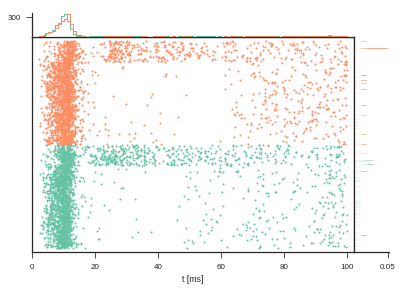

In [56]:
viziphant.rasterplot.rasterplot(
    [[x.time_slice(t_start=0*pq.s, t_stop=100*pq.ms) for x in bl1.segments[0].spiketrains],
     [x.time_slice(t_start=0*pq.s, t_stop=100*pq.ms) for x in bl2.segments[0].spiketrains]])

# Load DPSS data

In [62]:
ni_dpss = nestio.NestIO("./spikesDPSNN_24x24_SW06.gdf")
bl_dpss = ni_dpss.read_block(gid_list=ids, t_start = 0*pq.s, t_stop = 10*pq.s)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7cd254c890>,
 <matplotlib.axes._axes.Axes at 0x7f7cfec66a90>)

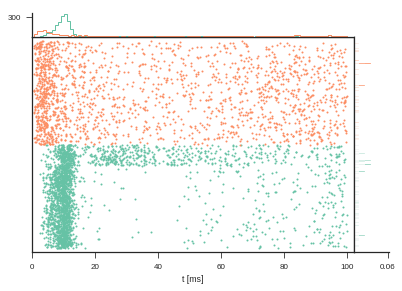

In [63]:
viziphant.rasterplot.rasterplot(
    [[x.time_slice(t_start=0*pq.s, t_stop=100*pq.ms) for x in bl1.segments[0].spiketrains],
     [x.time_slice(t_start=0*pq.s, t_stop=100*pq.ms) for x in bl_dpss.segments[0].spiketrains]])

In [61]:
?nestio.NestIO